In [1]:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv('SMSSpamCollection.csv', encoding='latin-1', header=None)

In [3]:
print(df.head())

      0                                                  1
0     0                                                  1
1   ham  Go until jurong point, crazy.. Available only ...
2   ham                      Ok lar... Joking wif u oni...
3  spam  Free entry in 2 a wkly comp to win FA Cup fina...
4   ham  U dun say so early hor... U c already then say...


In [4]:
df

,0,1
0,0,1
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ÃÂ¼ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [5]:
df = df.drop(0).reset_index(drop=True)

In [6]:
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
print(df.columns)

Index([0, 1], dtype='int64')


In [8]:
# Display the first few rows
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)


##we perform these  steps 
#data cleaning 
#EDa 
#text preporcessing 
#model building 
#evaluation 
#website 
#Deployment 

In [10]:

#rename 
df.rename(columns = {0 :'target', 1:'text'}, inplace = True)



In [11]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ÃÂ¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ÃÂ¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:

df.drop_duplicates(keep = 'first' , inplace = True)

### EDA

In [18]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5169, 2)

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:

import matplotlib.pyplot as plt 

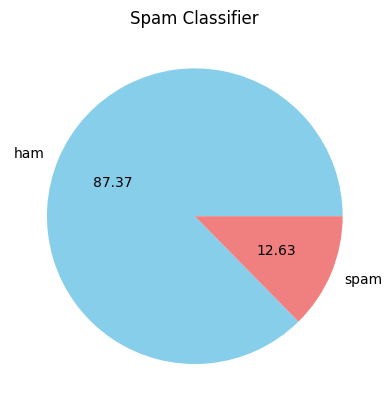

In [22]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', colors=['skyblue', 'lightcoral'])
plt.title('Spam Classifier')
plt.show()


In [23]:

import nltk

In [24]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:

df['num_character']=df['text'].apply(len)

In [26]:

df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163
5568,0,Will ÃÂ¼ b going to esplanade fr home?,39
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:

df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)


In [29]:

df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [30]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163,35,4
5568,0,Will ÃÂ¼ b going to esplanade fr home?,39,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,79.706326,18.578062,1.974076
std,58.651259,13.398272,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,71.135961,17.250664,1.827724
std,56.781426,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,138.977029,27.758040,2.986217
std,30.211744,6.993618,1.494815
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


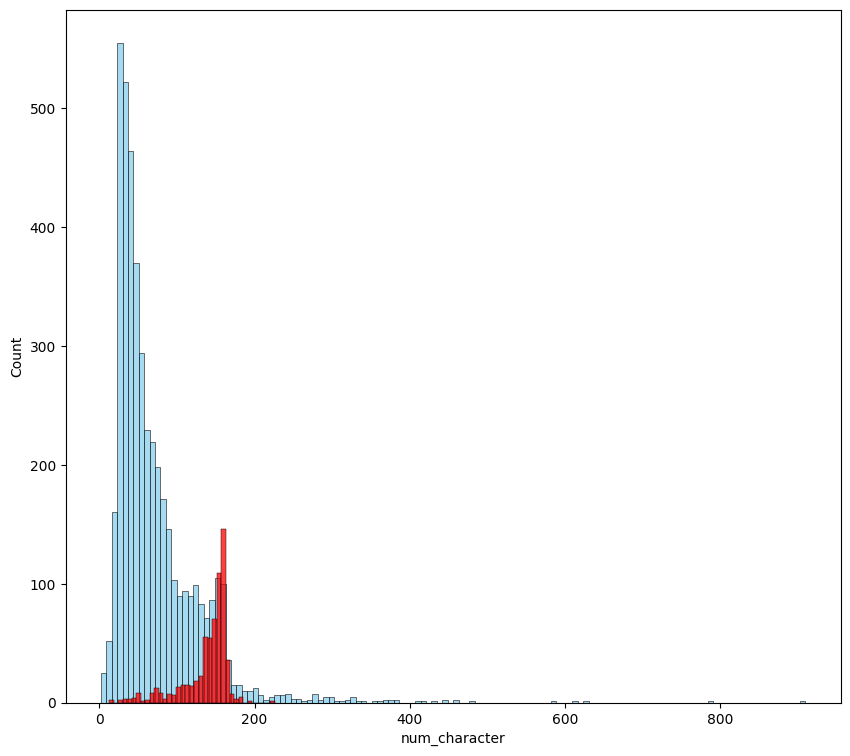

In [34]:

plt.figure(figsize=(10,9))
sns.histplot(df[df['target']==0]['num_character'], color = 'skyblue')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

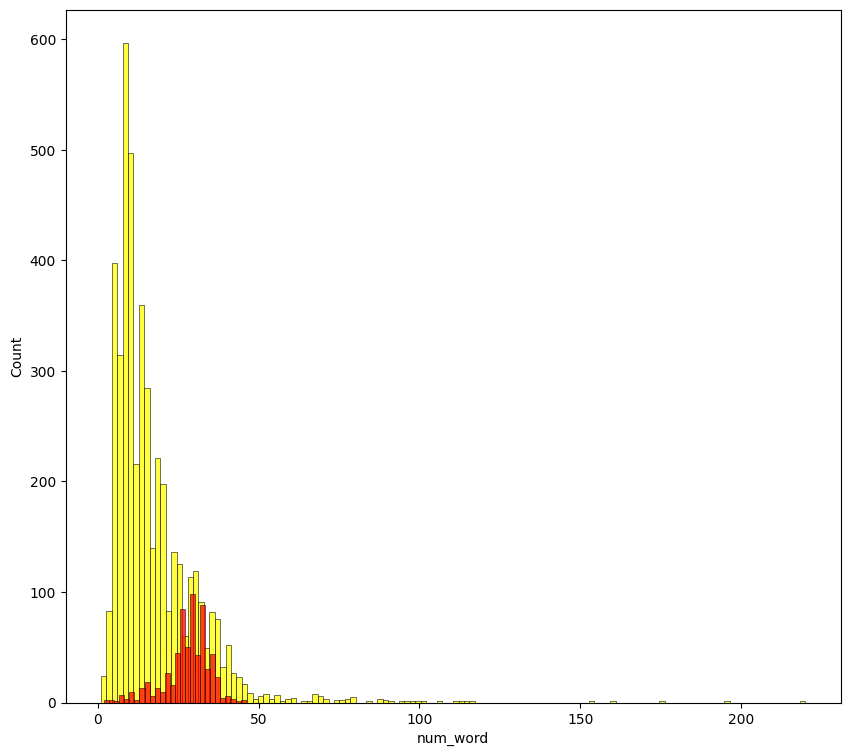

In [35]:

plt.figure(figsize=(10,9))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

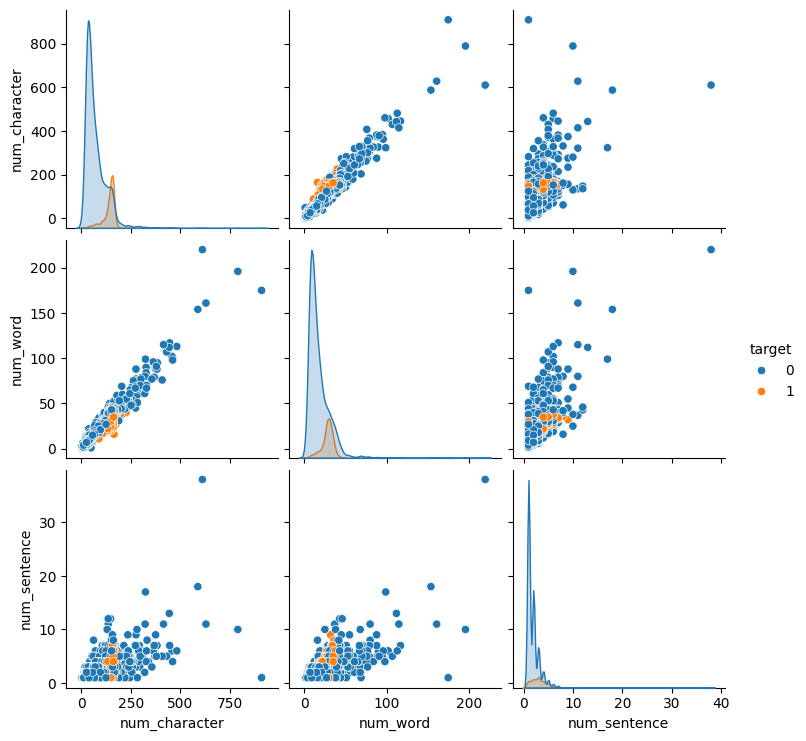

In [36]:

sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

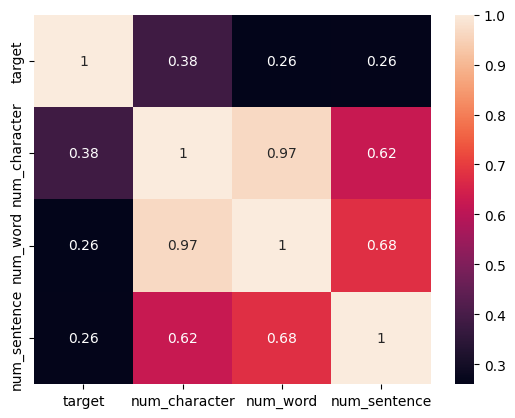

In [37]:

#to see correlation matrix 
df_correl = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_correl.corr() , annot = True)


### Data Preprocess 
#lower case 
#tokenization 
#remove special character 
#remove stopwords 
#stemming 

In [38]:




import string 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)


In [39]:

transform_text('HI I am interested in learning AI.are you?')

'hi interest learn'

In [40]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:

ps.stem('danceing')

'danc'

In [44]:

df['transformed_text']=df['text'].apply(transform_text)

In [45]:



df#

,target,text,num_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ÃÂ¼ b going to esplanade fr home?,39,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [46]:
#word cloud

from wordcloud import WordCloud

wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color ='grey')


In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

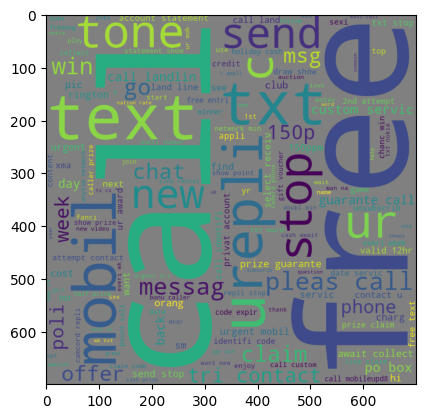

In [48]:

plt.imshow(spam_wc)

In [49]:

#word cloud for ham 

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

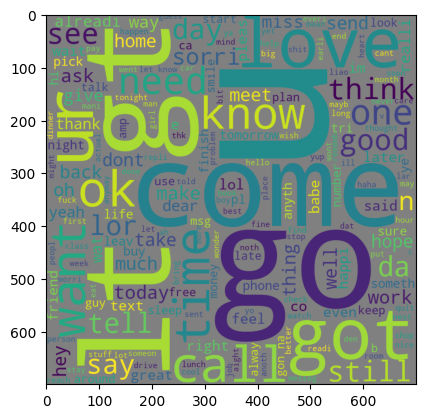

In [50]:

plt.imshow(ham_wc)

In [51]:
#top 50 words 

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:

len(spam_corpus)

9975

In [53]:

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:

len(ham_corpus)

35757

In [56]:

pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


### ML Model Building

In [61]:

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2500)

In [66]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

print(X.shape)

(5169, 2500)


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X.shape



(5169, 2500)

In [70]:

y = df['target'].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:

from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [74]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 

In [75]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
svc=SVC(kernel="sigmoid", gamma=1.0)
lrc=LogisticRegression(solver="liblinear", penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [76]:
clfs={
    "SVC":svc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "XGB":xgb
}

In [77]:

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred1)}")
print(f"Precision Score: {precision_score(y_test, y_pred1):.2f}")

Accuracy Score: 0.86
Confusion Matrix:
 [[781 127]
 [ 19 107]]
Precision Score: 0.46


In [78]:

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred2)}")
print(f"Precision Score: {precision_score(y_test, y_pred2):.2f}")

Accuracy Score: 0.98
Confusion Matrix:
 [[906   2]
 [ 17 109]]
Precision Score: 0.98


In [79]:

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred3)}")
print(f"Precision Score: {precision_score(y_test, y_pred3):.2f}")

Accuracy Score: 0.98
Confusion Matrix:
 [[906   2]
 [ 20 106]]
Precision Score: 0.98


In [80]:

def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [82]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9661508704061895, 0.9333333333333333)

In [84]:
p_df=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_score, "Precision":precision_score}).sort_values("Precision",ascending=False)

TypeError: '<' not supported between instances of 'function' and 'function'

In [ ]:


p_df

In [ ]:
p_df1=pd.melt(p_df, id_vars="Algorithm")

In [ ]:
p_df1

In [ ]:

accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print(" ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

In [88]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [89]:
df['transformed_text'][4532]

'wish thing differ wonder abl show much valu pl continu brisk walk drug without askin pleas find thing laugh love dearli'

In [126]:

df.sample(5)

,target,text,num_character,num_word,num_sentence,transformed_text
3062,0,What u talking bout early morning? It's almost...,66,15,2,u talk bout earli morn almost noon
292,0,Haf u found him? I feel so stupid da v cam was...,55,15,2,haf u found feel stupid da v cam work
4781,0,Sen told that he is going to join his uncle fi...,58,13,1,sen told go join uncl financ cbe
860,0,Did he just say somebody is named tampa,39,8,1,say somebodi name tampa
1375,1,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",156,28,2,500 new mobil 2004 must go txt nokia 89545 col...
